In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../..')
from os import remove

In [2]:
from pybandstructure.geometry import *
from pybandstructure.band_structure import * 
from pybandstructure.crystal import *
#from geometry.crystal_geometry import Crystal_Geometry
#import geometry.point_groups as point_groups 
#from band_structure.band_structure import Band_Structure
#from crystal.crystal import Crystal

In [3]:
BS = Band_Structure.from_file(file_name= '../test_output/test_band_structure.hdf5', band_structure_name= 'bands')

In [4]:
CG = Crystal_Geometry(reciprocal_lattice_basis = BS.k_sample.basis_vectors, point_group = point_groups.D6_2D())

In [5]:
graphene = Crystal(geometry=CG, band_structure=BS, eta = 1e-2)

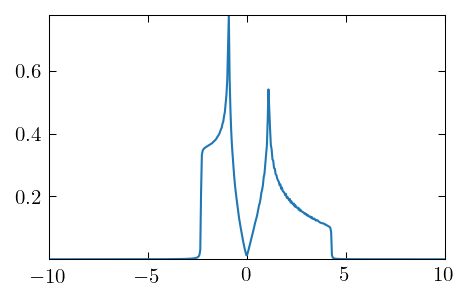

In [6]:
evals = np.linspace(-10,10, num=500)
plt.plot(evals, graphene.dos(evals))

In [7]:
graphene.band_structure.energies.shape

(2, 7651)

(0.0, 5.721993830861645)

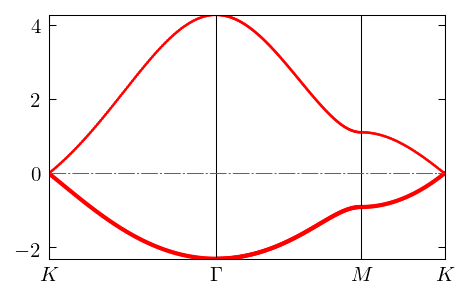

In [8]:
contour = [r'$K$',r'$\Gamma$',r'$M$',r'$K$']
index,distance,points = graphene.band_structure.k_sample.contour(contour)

for j in range(len(contour)):
    plt.plot([distance[points[j]], distance[points[j]]],[np.amin(graphene.band_structure.energies),np.amax(graphene.band_structure.energies)],c='k',lw=0.5)
for i in range(2):
    plt.plot(distance,graphene.band_structure.energies[i,index],c='r')
    plt.scatter(distance,graphene.band_structure.energies[i,index], s =  graphene.band_structure.occupations[i,index]  +0.1, c= 'r')
plt.plot([distance[0], distance[-1]], [graphene.band_structure.chemical_potential,graphene.band_structure.chemical_potential],'-.',lw = 0.5)
plt.xticks(distance[points],contour)
plt.xlim([distance[0], distance[-1]])

In [9]:
M, nz= graphene.get_transformation_matrix(tensor_order=4)

In [10]:
graphene.band_structure.chemical_potential = 0.5
x = np.linspace(0,10, num =500)
y = graphene.local_interband_conductivity(x)[:,0,0]

../..\pybandstructure\band_structure\band_structure.py:123: UserWarning: changing chemical potential 
                         without changing band structure
  without changing band structure''')
0it [00:00, ?it/s]../..\pybandstructure\crystal\analysis\conductivity_functions.py:9: RuntimeWarning: invalid value encountered in true_divide
  prefactor = - occupation_diff / energy_diff
500it [00:03, 130.75it/s]


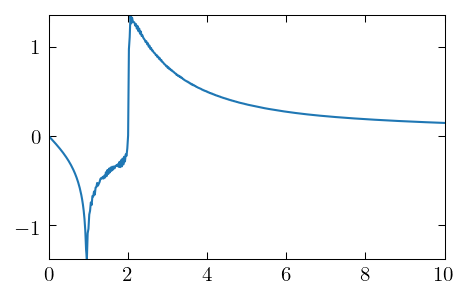

In [11]:
plt.plot(x,y.imag)

In [12]:
graphene.eta = 0.05